In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Each path specification

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'

# Number of classifications setting

In [3]:
NUM_CLASSES = 9

# Training Data Loading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model Building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 9)                   │              99 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,169 (4.57 KB)

 Trainable params: 1,169 (4.57 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model Checkpoint Callbacks
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callbacks for early censoring
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model Compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
32/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1692 - loss: 2.2427 
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1782 - loss: 2.2196 - val_accuracy: 0.2885 - val_loss: 2.0551
Epoch 2/1000
30/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2253 - loss: 2.0825 
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2339 - loss: 2.0659 - val_accuracy: 0.3259 - val_loss: 1.8895
Epoch 3/1000
42/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2957 - loss: 1.9403 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3029 - loss: 1.9248 - val_accuracy: 0.3981 - val_loss: 1.6795
Epoch 4/1000
37/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3635 - loss: 1.7735 
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras

In [12]:
# Model Evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9481 - loss: 0.3020 


In [13]:
# Loading a Saved Model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference Tests
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
[2.3955345e-05 9.9013305e-01 8.5539490e-08 1.5742776e-06 4.7127595e-03
 2.4114836e-03 2.6783610e-03 6.7615883e-06 3.1847281e-05]
1


81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


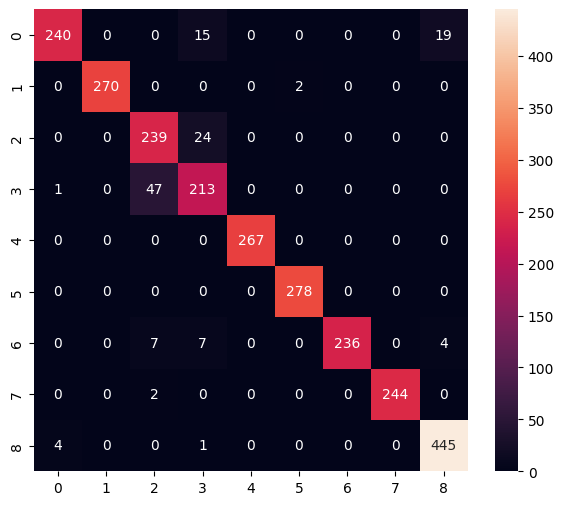

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.88      0.92       274
           1       1.00      0.99      1.00       272
           2       0.81      0.91      0.86       263
           3       0.82      0.82      0.82       261
           4       1.00      1.00      1.00       267
           5       0.99      1.00      1.00       278
           6       1.00      0.93      0.96       254
           7       1.00      0.99      1.00       246
           8       0.95      0.99      0.97       450

    accuracy                           0.95      2565
   macro avg       0.95      0.94      0.95      2565
weighted avg       0.95      0.95      0.95      2565



In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite

In [16]:
# Save as an inference-only model
model.save(model_save_path, include_optimizer=False)

In [ ]:
# Create a concrete function from the Keras model
run_model = tf.function(lambda x: model(x))
concrete_func = run_model.get_concrete_function(tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype))

# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
with open(tflite_save_path, 'wb') as f:
    f.write(tflite_quantized_model)